## House Price of India project
## Часть 3: Гипотезы. Машинное обучение.

In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as sts

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

*В прошлой серии...* мы удалили выбросы и ошибочные данные и получили следующее:

In [314]:
df = pd.read_csv('my_data2.csv')

In [315]:
df

,Number of bedrooms,Number of bathrooms,Living area,Lot area,Average Room Size,Floor Area Ratio,Number of floors,Waterfront present,Average views number,Condition of the house,Built Year,House Age,Renovation Year,Was Renovated,Postal Code,Number of schools nearby,Distance from the airport,Price
0,4,3,2920,4000,730,0.73,1.5,0,0,5,1909,114,1909,No,122004,2,51,1400000
1,5,3,2910,9480,582,0.31,1.5,0,0,3,1939,84,1939,No,122004,1,53,1200000
2,3,2,2710,4500,903,0.60,1.5,0,0,4,1929,94,1929,No,122006,1,51,805000
3,3,3,2600,4750,866,0.55,1.0,0,0,4,1951,72,1951,No,122007,1,67,790000
4,5,4,3660,11995,732,0.31,2.0,0,2,3,2006,17,2006,No,122008,3,72,785000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12587,2,2,1556,20000,778,0.08,1.0,0,0,4,1957,66,1957,No,122066,3,76,221700
12588,3,2,1680,7000,560,0.24,1.5,0,0,4,1968,55,1968,No,122072,3,59,219200
12589,2,1,1070,6120,535,0.17,1.0,0,0,3,1962,61,1962,No,122056,2,64,209000
12590,4,1,1030,6621,257,0.16,1.0,0,0,4,1955,68,1955,No,122042,3,54,205000


А также сделали главные выводы, от чего зависит цена дома.

Больше всего на цену влияют такие параметры, как:

- Жилая площадь - положительная корреляция, чем больше жилая площадь, тем выше рыночная цена дома.
- Количество ванных комнат - положительная корреляция, чем больше ванных комнат, тем выше рыночная цена дома (при этом у количества ванных и жилой площади тоже очень высокая положительная корреляция, а как мы помним, ванные комнаты к жилой площади не относятся).
- Количество спален - положительная корреляция, чем больше спальных комнат, тем выше рыночная цена дома (при этом важно помнить факт, что спальни прямо коррелируют с жилой площадью, но к жилой площади также относятся и другие комнаты).
- Оценка состояния дома - положительная корреляция, чем выше оценка, тем выше рыночная цена дома.

Однако проверить бы хотелось другие интересные гипотезы. Но перед началом добавим новый признак нашему датасету:

In [316]:
df['Price for 1 sq.foot'] = df['Price'] / df['Living area']
df['Price for 1 sq.foot'] = df['Price for 1 sq.foot'].astype(int)

In [317]:
df

,Number of bedrooms,Number of bathrooms,Living area,Lot area,Average Room Size,Floor Area Ratio,Number of floors,Waterfront present,Average views number,Condition of the house,Built Year,House Age,Renovation Year,Was Renovated,Postal Code,Number of schools nearby,Distance from the airport,Price,Price for 1 sq.foot
0,4,3,2920,4000,730,0.73,1.5,0,0,5,1909,114,1909,No,122004,2,51,1400000,479
1,5,3,2910,9480,582,0.31,1.5,0,0,3,1939,84,1939,No,122004,1,53,1200000,412
2,3,2,2710,4500,903,0.60,1.5,0,0,4,1929,94,1929,No,122006,1,51,805000,297
3,3,3,2600,4750,866,0.55,1.0,0,0,4,1951,72,1951,No,122007,1,67,790000,303
4,5,4,3660,11995,732,0.31,2.0,0,2,3,2006,17,2006,No,122008,3,72,785000,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12587,2,2,1556,20000,778,0.08,1.0,0,0,4,1957,66,1957,No,122066,3,76,221700,142
12588,3,2,1680,7000,560,0.24,1.5,0,0,4,1968,55,1968,No,122072,3,59,219200,130
12589,2,1,1070,6120,535,0.17,1.0,0,0,3,1962,61,1962,No,122056,2,64,209000,195
12590,4,1,1030,6621,257,0.16,1.0,0,0,4,1955,68,1955,No,122042,3,54,205000,199


Для проверки гипотез будем использовать именно эту переменную, чтобы исключить влияние жилой площади.

---

## Проверка гипотез

### Гипотеза 1. Разброс цен на дома не зависит от города

В прошлой части мы построили распределение средней стоимости недвижимости в зависимости от района дома (район дома мы определяем почтовым индексом). Мы нашли районы с самой высокой средней рыночной ценой, и с самой низкой. Было бы интересно проверить зависит ли разброс рыночных цен от города. Для этого сгруппируем почтовые индексы по городам, к которым они относятся.

Почтовый индекс индии состоит из 6 цифр, первые две определяют определяют регион или провинцию, последние три - главный город, почтовое отделение. Наши дома находятся в одном регионе, однако в разных городах. 

г. Гургаон, почтовые индексы: 122003, 122004, 122005, 122006, 122007, 122008, 122009, 122010, 122011, 122012, 122015, 122016, 122017, 122018, 122021, 122022, 122050, 122051, 122052. (19)

г. Нью-Дели, почтовые индексы: 122013, 122014, 122019, 122020, 122023, 122024, 122025, 122026, 122027, 122028, 122029, 122030, 122040, 122041, 122047, 122048, 122063, 122064, 122065, 122066, 122069. (21)

г. Фаридабад, почтовые индексы: 122031, 122032, 122033, 122034, 122035, 122036, 122038, 122039, 122042, 122043, 122044, 122045, 122046, 122049, 122061, 122062, 122070, 122071, 122072. (19)

г. Газиабад, почтовые индексы: 122037, 122053, 122054, 122055, 122056, 122057, 122058, 122059, 122060, 122067, 122068. (11)

 Предположим, что дисперсия стоимости 1 кв. фут. дома одинакова для всех домов Индиии, независимо от города.

* H0: разброс цен на дома не зависит от города
* H1: разброс цен на дома зависит от города

Будем использовать **тест Левена** и медиану для проверки гипотезы, а также нашу новую перменную.

In [318]:
huragon = df.loc[df['Postal Code'].isin([122003, 122004, 122005, 122006, 122007,
                                         122008, 122009, 122010, 122011, 122012, 
                                         122015, 122016, 122017, 122018, 122021,
                                         122022, 122050, 122051, 122052])]['Price for 1 sq.foot']

deli = df.loc[df['Postal Code'].isin([122013, 122014, 122019, 122020, 122023,
                                      122024, 122025, 122026, 122027, 122028, 
                                      122029, 122030, 122040, 122041, 122047, 
                                      122048, 122063, 122064, 122065, 122066, 122069])]['Price for 1 sq.foot']

fari = df.loc[df['Postal Code'].isin([122031, 122032, 122033, 122034, 122035, 
                                      122036, 122038, 122039, 122042, 122043, 
                                      122044, 122045, 122046, 122049, 122061,
                                      122062, 122070, 122071, 122072])]['Price for 1 sq.foot']

gazi = df.loc[df['Postal Code'].isin([122037, 122053, 122054, 122055,
                                      122056, 122057, 122058, 122059, 
                                      122060, 122067, 122068])]['Price for 1 sq.foot']

Проводим тест:

In [319]:
a = sts.levene(huragon, deli, fari, gazi, center = 'median')[1]

print('p-value: ', a)

if a < 0.05:
    print('Отвергаем гипотезу о равности дисперсий цен в разных городах')
else:
    print('Не отвергаем гипотезу о равности дисперсий цен в разных городах')

p-value:  1.714979681310368e-23
Отвергаем гипотезу о равности дисперсий цен в разных городах


Мы отвергаем гипотезу о том, что разброс цен во всех городах одинаковый, потому значение p-value очень маленькое. Скорее всего это связано с тем, что стоимость недвижимости, например, в Нью-Дели (один из самых дорогих городов Индии) начинается от какого-то большого значения, нежели чем в других более бедных городах.

---

## Машинное обучение

Создаём машинки, предсказывающие цену недвижимости.

Перед началом дропнем переменные:

In [320]:
df = df.drop(['Was Renovated', 'Price for 1 sq.foot'], axis = 1)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12592 entries, 0 to 12591
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number of bedrooms         12592 non-null  int64  
 1   Number of bathrooms        12592 non-null  int64  
 2   Living area                12592 non-null  int64  
 3   Lot area                   12592 non-null  int64  
 4   Average Room Size          12592 non-null  int64  
 5   Floor Area Ratio           12592 non-null  float64
 6   Number of floors           12592 non-null  float64
 7   Waterfront present         12592 non-null  int64  
 8   Average views number       12592 non-null  int64  
 9   Condition of the house     12592 non-null  int64  
 10  Built Year                 12592 non-null  int64  
 11  House Age                  12592 non-null  int64  
 12  Renovation Year            12592 non-null  int64  
 13  Postal Code                12592 non-null  int

In [322]:
train, test = train_test_split(df, test_size = 0.2)

Разделяем данные на признаки и целевую переменную (15 признаков, последний столбец - цена):

In [323]:
x_train = train.iloc[:, :15].values
x_test = test.iloc[:, :15].values

In [324]:
y_train = train['Price'].values
y_test = test['Price'].values

---

# Линейная регрессия

In [325]:
machine1 = LinearRegression()

In [326]:
machine1.fit(x_train, y_train)

LinearRegression()

In [327]:
machine1res = machine1.predict(x_test)

Визуализируем:

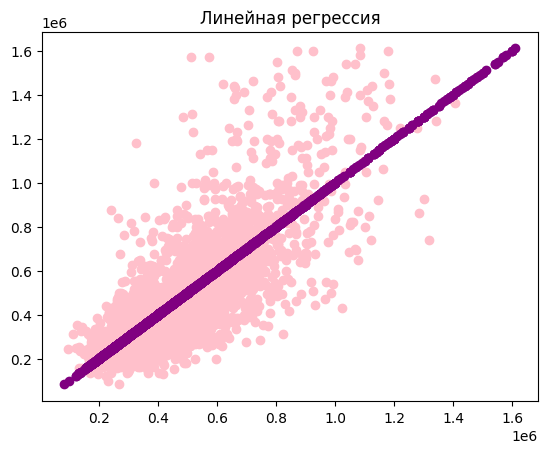

In [328]:
plt.scatter(machine1res, y_test, color = 'pink')
plt.scatter(y_test, y_test, color = 'purple')

plt.title('Линейная регрессия')

plt.show()

In [329]:
print('Средний квадрат отклонения = ', round(mean_squared_error(y_test, machine1res), 3))
print('Средний модуль отклонения = ', round(mean_absolute_error(y_test, machine1res), 3))
print('Средний процент отклонения = ', round(mean_absolute_percentage_error(y_test, machine1res), 3))
print('Коэффициент детерминации = ', round(r2_score(y_test, machine1res), 3))

Средний квадрат отклонения =  29566759612.771
Средний модуль отклонения =  123968.967
Средний процент отклонения =  0.279
Коэффициент детерминации =  0.573


Точность - 56%

---

## Decision Tree Regressor

In [330]:
machine2 = DecisionTreeRegressor()

In [331]:
machine2.fit(x_train, y_train)

DecisionTreeRegressor()

In [332]:
machine2res = machine2.predict(x_test)

Визуализируем:

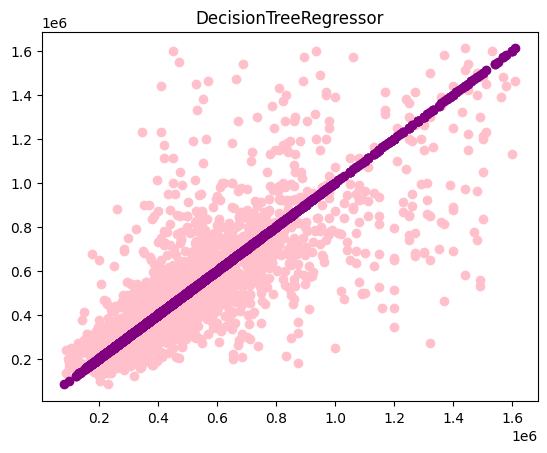

In [333]:
plt.scatter(machine2res, y_test, color = 'pink')
plt.scatter(y_test, y_test, color = 'purple')

plt.title("DecisionTreeRegressor")

plt.show()

In [334]:
print('Средний квадрат отклонения = ', round(mean_squared_error(y_test, machine2res), 3))
print('Средний модуль отклонения = ', round(mean_absolute_error(y_test, machine2res), 3))
print('Средний процент отклонения = ', round(mean_absolute_percentage_error(y_test, machine2res), 3))
print('Коэффициент детерминации = ', round(r2_score(y_test, machine2res), 3))

Средний квадрат отклонения =  30650826452.845
Средний модуль отклонения =  106486.647
Средний процент отклонения =  0.219
Коэффициент детерминации =  0.557


Точность - 55%

---

## XGBRF Regressor

In [335]:
machine3 = XGBRFRegressor()

In [336]:
machine3.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [337]:
machine3res = machine3.predict(x_test)

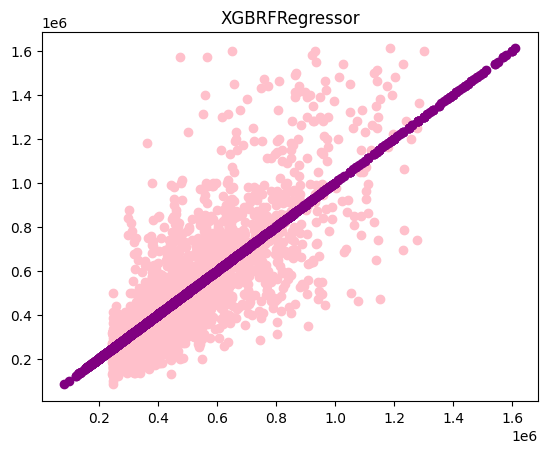

In [338]:
plt.scatter(machine3res, y_test, color = 'pink')
plt.scatter(y_test, y_test, color = 'purple')

plt.title("XGBRFRegressor")

plt.show()

In [339]:
print('Средний квадрат отклонения = ', round(mean_squared_error(y_test, machine3res), 3))
print('Средний модуль отклонения = ', round(mean_absolute_error(y_test, machine3res), 3))
print('Средний процент отклонения = ', round(mean_absolute_percentage_error(y_test, machine3res), 3))
print('Коэффициент детерминации = ', round(r2_score(y_test, machine3res), 3))

Средний квадрат отклонения =  28270677981.277
Средний модуль отклонения =  118604.966
Средний процент отклонения =  0.264
Коэффициент детерминации =  0.592


Точность - 58%

---

## XGB Regressor

In [340]:
machine4 = XGBRegressor()

In [341]:
machine4.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [342]:
machine4res = machine4.predict(x_test)

Визуализируем:

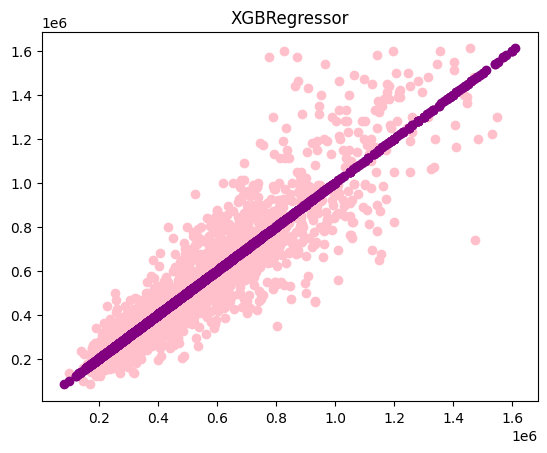

In [343]:
plt.scatter(machine4res, y_test, color = 'pink')
plt.scatter(y_test, y_test, color = 'purple')

plt.title("XGBRegressor")

plt.show()

In [344]:
print('Средний квадрат отклонения = ', round(mean_squared_error(y_test, machine4res), 3))
print('Средний модуль отклонения = ', round(mean_absolute_error(y_test, machine4res), 3))
print('Средний процент отклонения = ', round(mean_absolute_percentage_error(y_test, machine4res), 3))
print('Коэффициент детерминации = ', round(r2_score(y_test, machine4res), 3))

Средний квадрат отклонения =  11830370275.254
Средний модуль отклонения =  71218.399
Средний процент отклонения =  0.146
Коэффициент детерминации =  0.829


Точность - 83%

---

###### done by meow_lin